In [ ]:
# encoding: UTF-8

"""
导入MC导出的CSV历史数据到MongoDB中
"""

from vnpy.trader.app.ctaStrategy.ctaBase import MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.ctaHistoryData import loadMcCsv


if __name__ == '__main__':
    loadMcCsv('IF0000_1min.csv', MINUTE_DB_NAME, 'IF0000')
    loadMcCsv('rb0000_1min.csv', MINUTE_DB_NAME, 'rb0000')



开始读取CSV文件IF0000_1min.csv中的数据插入到VnTrader_1Min_Db的IF0000中
20100416 09:16:00
20100416 09:17:00
20100416 09:18:00
20100416 09:19:00
20100416 09:20:00
20100416 09:21:00
20100416 09:22:00
20100416 09:23:00
20100416 09:24:00
20100416 09:25:00
20100416 09:26:00
20100416 09:27:00
20100416 09:28:00
20100416 09:29:00
20100416 09:30:00
20100416 09:31:00
20100416 09:32:00
20100416 09:33:00
20100416 09:34:00
20100416 09:35:00
20100416 09:36:00
20100416 09:37:00
20100416 09:38:00
20100416 09:39:00
20100416 09:40:00
20100416 09:41:00
20100416 09:42:00
20100416 09:43:00
20100416 09:44:00
20100416 09:45:00
20100416 09:46:00
20100416 09:47:00
20100416 09:48:00
20100416 09:49:00
20100416 09:50:00
20100416 09:51:00
20100416 09:52:00
20100416 09:53:00
20100416 09:54:00
20100416 09:55:00
20100416 09:56:00
20100416 09:57:00
20100416 09:58:00
20100416 09:59:00
20100416 10:00:00
20100416 10:01:00
20100416 10:02:00
20100416 10:03:00
20100416 10:04:00
20100416 10:05:00
20100416 10:06:00
20100416 10:07:00
20100416

In [42]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
#from vnpy.trader.app.ctaStrategy.strategy.strategyMultiTimeframe import MultiTimeframeStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyMultiSignal import MultiSignalStrategy

In [43]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [44]:
engine.dailyResultDict

OrderedDict()

In [45]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20130101')               # 设置回测用的数据起始日期

In [46]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [47]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
#ngine.initStrategy(MultiTimeframeStrategy, d)    
#engine.initStrategy(MultiSignalStrategy, {})    

In [48]:
# 运行回测
engine.runBacktesting()          # 运行回测

2018-08-07 15:36:32.954000	开始载入数据
2018-08-07 15:36:33.162000	载入完成，数据量：19120
2018-08-07 15:36:33.162000	开始回测
2018-08-07 15:36:33.190000	策略初始化完成
2018-08-07 15:36:33.190000	策略启动完成
2018-08-07 15:36:33.190000	开始回放数据
2018-08-07 15:36:35.063000	数据回放结束


2018-08-07 15:36:36.646000	计算按日统计结果
2018-08-07 15:36:36.660000	------------------------------
2018-08-07 15:36:36.660000	首个交易日：	2013-01-11
2018-08-07 15:36:36.660000	最后交易日：	2013-04-23
2018-08-07 15:36:36.660000	总交易日：	66
2018-08-07 15:36:36.660000	盈利交易日	33
2018-08-07 15:36:36.660000	亏损交易日：	33
2018-08-07 15:36:36.660000	起始资金：	1000000
2018-08-07 15:36:36.660000	结束资金：	1,077,545.51
2018-08-07 15:36:36.660000	总收益率：	7.75%
2018-08-07 15:36:36.660000	年化收益：	28.2%
2018-08-07 15:36:36.660000	总盈亏：	77,545.51
2018-08-07 15:36:36.660000	最大回撤: 	-59,578.44
2018-08-07 15:36:36.660000	百分比最大回撤: -5.44%
2018-08-07 15:36:36.660000	总手续费：	7,894.49
2018-08-07 15:36:36.660000	总滑点：	20,340.0
2018-08-07 15:36:36.660000	总成交金额：	263,149,680.0
2018-08-07 15:36:36.660000	总成交笔数：	339.0
2018-08-07 15:36:36.660000	日均盈亏：	1,174.93
2018-08-07 15:36:36.660000	日均手续费：	119.61
2018-08-07 15:36:36.660000	日均滑点：	308.18
2018-08-07 15:36:36.660000	日均成交金额：	3,987,116.36
2018-08-07 15:36:36.660000	日均成交笔数：	5.14
2018-08-07 15:36:36.660000	日均收

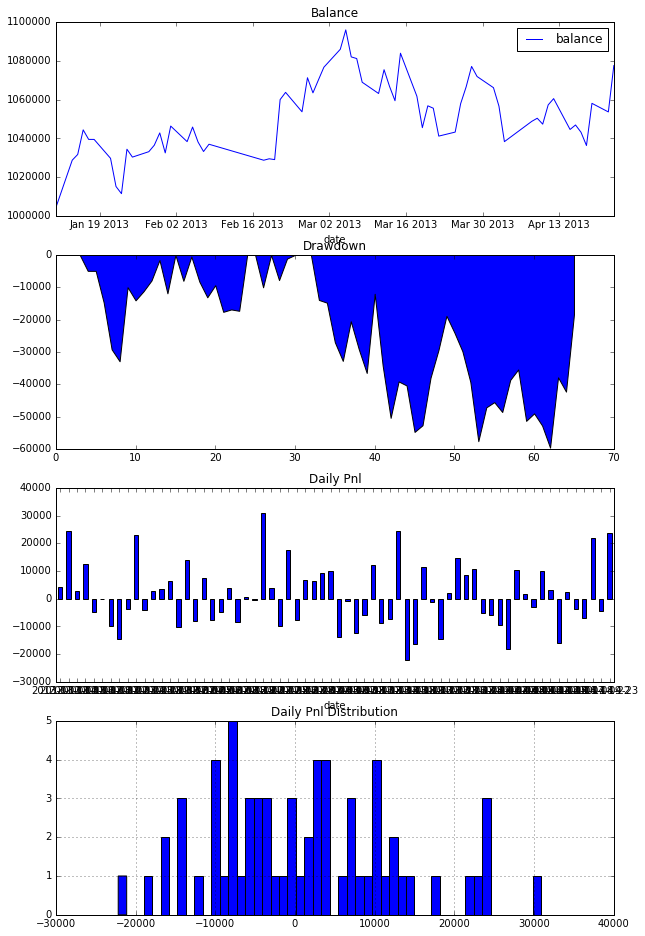

In [49]:
# 显示逐日回测结果
engine.showDailyResult()

2018-08-07 15:36:45.880000	计算回测结果
2018-08-07 15:36:45.884000	------------------------------
2018-08-07 15:36:45.884000	第一笔交易：	2013-01-11 10:16:00
2018-08-07 15:36:45.884000	最后一笔交易：	2013-04-23 14:25:00
2018-08-07 15:36:45.884000	总交易次数：	170.0
2018-08-07 15:36:45.884000	总盈亏：	77,463.44
2018-08-07 15:36:45.884000	最大回撤: 	-67,904.29
2018-08-07 15:36:45.884000	平均每笔盈利：	455.67
2018-08-07 15:36:45.884000	平均每笔滑点：	120.0
2018-08-07 15:36:45.884000	平均每笔佣金：	46.57
2018-08-07 15:36:45.884000	胜率		38.24%
2018-08-07 15:36:45.884000	盈利交易平均值	7,184.89
2018-08-07 15:36:45.884000	亏损交易平均值	-3,710.04
2018-08-07 15:36:45.884000	盈亏比：	1.94


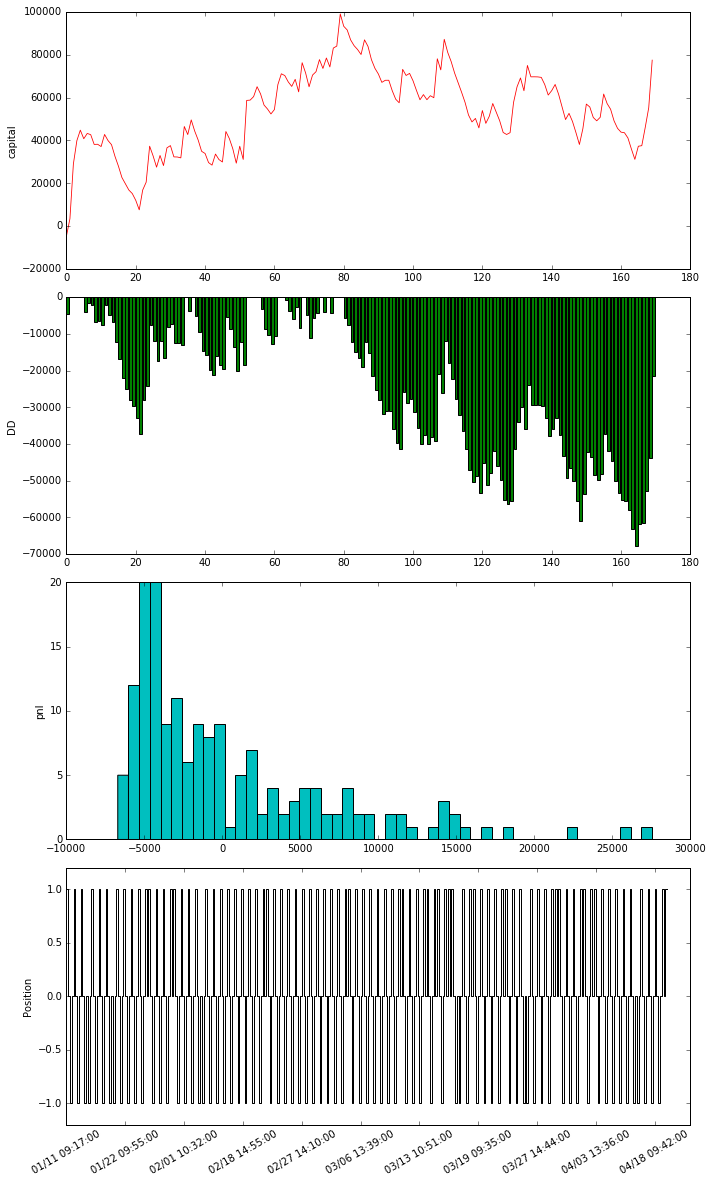

In [50]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [ ]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

In [ ]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('totalNetPnl')        # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 16, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
#setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
#setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
#resultList = engine.runParallelOptimization(AtrRsiStrategy, setting)
resultList = engine.runOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

In [ ]:
# 显示优化的所有统计数据
for result in resultList:
    print '-' * 30
    print u'参数：%s，目标：%s' %(result[0], result[1])
    print u'统计数据：'
    for k, v in result[2].items():
        print u'%s：%s' %(k, v)